# ACS2 in Multiplexer

In [1]:
%matplotlib inline

# General
from __future__ import unicode_literals

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

import numpy as np
import pandas as pd

# Logger
import logging
logging.basicConfig(level=logging.WARN)

# ALCS + custom environments
import sys, os
sys.path.append(os.path.abspath('../../..'))

# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# Load PyALCS module
from lcs.agents import EnvironmentAdapter
from lcs.agents.acs2 import ACS2, Configuration, ClassifiersList
from lcs.metrics import population_metrics

# Load environments
import gym
import gym_multiplexer

## Multiplexer

In [2]:
mp = gym.make('boolean-multiplexer-20bit-v0')
situation = mp.reset()

# render phenotype
mp.render()

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [3]:
# perform random action
state, reward, done, _ = mp.step(mp.action_space.sample())
print(f"New state: {state}, reward: {reward}, is done: {done}")

New state: [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], reward: 0, is done: True


## Environment adapter

In [4]:
class MultiplexerAdapter(EnvironmentAdapter):
    @staticmethod
    def to_genotype(phenotype):
        return [str(x) for x in phenotype]

In [5]:
genotype = MultiplexerAdapter().to_genotype(state)
''.join(genotype)

'010100101101101001110'

## Go agent, go...
Perform experiment for a couple of explore/exploit trials.

In [6]:
def get_6bit_mp_actors():        
    mp = gym.make('boolean-multiplexer-6bit-v0')
    cfg = Configuration(
        mp.env.observation_space.n, 2,
        environment_adapter=MultiplexerAdapter(),
        user_metrics_collector_fcn=population_metrics,
        do_ga=True)

    return ACS2(cfg), mp

def get_11bit_mp_actors():
    mp = gym.make('boolean-multiplexer-11bit-v0')    
    cfg = Configuration(
        mp.env.observation_space.n, 2,
        environment_adapter=MultiplexerAdapter(),
        user_metrics_collector_fcn=population_metrics,
        do_ga=True)

    return ACS2(cfg), mp

def get_20bit_mp_actors():
    mp = gym.make('boolean-multiplexer-20bit-v0')
    cfg = Configuration(
        mp.env.observation_space.n, 2,
        environment_adapter=MultiplexerAdapter(),
        user_metrics_collector_fcn=population_metrics,
        do_ga=True)

    return ACS2(cfg), mp

In [7]:
def perform_experiment(agent, env, trials=250_000):
    population, metrics = agent.explore_exploit(env, trials)
    
    print("Population size: {}".format(metrics[-1]['population']))
    print("Reliable size: {}".format(metrics[-1]['reliable']))
    print(metrics[-1])
    
    reliable_classifiers = [c for c in population if c.is_reliable()]
    reliable_classifiers = sorted(reliable_classifiers, key=lambda cl: -cl.fitness)

    # Print top 10 reliable classifiers
    for cl in reliable_classifiers[:10]:
        print(f"{cl}, q: {cl.q:.2f}, fit: {cl.fitness:.2f}, exp: {cl.exp:.2f}")
    
    return population, metrics

Here you will probably want to run these experiments for about 250k trials.

In [8]:
TRIALS = 5_000

### 6-bit MPX

In [9]:
%%time
p6, m6 = perform_experiment(*get_6bit_mp_actors(), trials=TRIALS)

Population size: 125
Reliable size: 39
{'trial': 9995, 'steps_in_trial': 1, 'reward': 1000, 'population': 125, 'numerosity': 333, 'reliable': 39}
10##1##-1-######1 @ 0x117477d68, q: 1.00, fit: 1000.00, exp: 418.00
11###1#-1-######1 @ 0x117494f98, q: 1.00, fit: 1000.00, exp: 433.00
001####-1-######1 @ 0x1174be588, q: 1.00, fit: 1000.00, exp: 418.00
000####-0-######1 @ 0x1174be710, q: 1.00, fit: 1000.00, exp: 417.00
0#11###-1-######1 @ 0x1174bea20, q: 1.00, fit: 1000.00, exp: 381.00
11###0#-0-######1 @ 0x117468e10, q: 1.00, fit: 1000.00, exp: 396.00
#00#0##-0-######1 @ 0x11742a400, q: 1.00, fit: 1000.00, exp: 397.00
01#0###-0-######1 @ 0x117442710, q: 1.00, fit: 1000.00, exp: 398.00
01#1###-1-######1 @ 0x117468ba8, q: 1.00, fit: 1000.00, exp: 354.00
10##0##-0-######1 @ 0x1174e7b38, q: 1.00, fit: 1000.00, exp: 298.00
CPU times: user 15.7 s, sys: 134 ms, total: 15.9 s
Wall time: 16.5 s


### 11-bit MPX

In [10]:
%%time
p11, m11 = perform_experiment(*get_11bit_mp_actors(), trials=TRIALS)

Population size: 1014
Reliable size: 79
{'trial': 9995, 'steps_in_trial': 1, 'reward': 1000, 'population': 1014, 'numerosity': 1264, 'reliable': 79}
00#11######0-1-###########1 @ 0x11784b860, q: 1.00, fit: 1000.00, exp: 219.00
#001###1###0-1-###########1 @ 0x117802a20, q: 1.00, fit: 1000.00, exp: 215.00
101#####0###-0-###########1 @ 0x117783278, q: 1.00, fit: 1000.00, exp: 195.00
#01#0###0###-0-###########1 @ 0x117a363c8, q: 1.00, fit: 1000.00, exp: 176.00
#11###1###10-1-###########1 @ 0x117442b00, q: 1.00, fit: 1000.00, exp: 189.00
1#0####1#1#0-1-###########1 @ 0x117afeba8, q: 1.00, fit: 1000.00, exp: 201.00
#01#1###1##0-1-###########1 @ 0x1178bac50, q: 1.00, fit: 1000.00, exp: 204.00
01###11####0-1-###########1 @ 0x117870630, q: 1.00, fit: 1000.00, exp: 188.00
#10##0###0#0-0-###########1 @ 0x117bc3ba8, q: 1.00, fit: 1000.00, exp: 196.00
011###1####0-1-###########1 @ 0x11761e860, q: 1.00, fit: 1000.00, exp: 192.00
CPU times: user 1min 24s, sys: 848 ms, total: 1min 25s
Wall time: 1min 

### 20-bit MPX

In [11]:
%%time
p20, m20 = perform_experiment(*get_20bit_mp_actors(), trials=TRIALS)

Population size: 4234
Reliable size: 24
{'trial': 9995, 'steps_in_trial': 1, 'reward': 0, 'population': 4234, 'numerosity': 4288, 'reliable': 24}
#0000#######0#######0-0-####################1 @ 0x11843ce10, q: 1.00, fit: 1000.00, exp: 105.00
#001#1#######1######0-1-####################1 @ 0x11889dcf8, q: 1.00, fit: 999.99, exp: 85.00
1#11###########1###10-1-####################1 @ 0x118297f28, q: 1.00, fit: 999.77, exp: 59.00
1101#######1#####0##0-0-####################1 @ 0x11807b630, q: 1.00, fit: 999.73, exp: 61.00
1#11###########0##000-0-####################1 @ 0x1181fb9e8, q: 1.00, fit: 999.29, exp: 48.00
111############0##000-0-####################1 @ 0x118002550, q: 1.00, fit: 997.76, exp: 42.00
0001#1##############0-1-####################1 @ 0x1190cd400, q: 1.00, fit: 997.18, exp: 51.00
010#####11#1########0-1-####################1 @ 0x118685ba8, q: 1.00, fit: 996.99, exp: 44.00
11#1############11#10-1-####################1 @ 0x118927be0, q: 1.00, fit: 996.71, exp: 43.00
0010#1

In [12]:
def parse_metrics(metrics):
    lst = [[
        m['trial'],
        m['numerosity'],
        m['reliable'],
        m['reward'],
    ] for m in metrics]

    df = pd.DataFrame(lst, columns=['trial', 'numerosity', 'reliable', 'reward'])
    df = df.set_index('trial')

    return df

In [13]:
# parse metrics to df
df6bit = parse_metrics(m6)
df11bit = parse_metrics(m11)
df20bit = parse_metrics(m20)

## Number of reliable classifiers

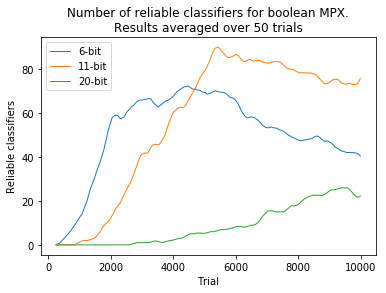

In [14]:
window=50

fig, ax = plt.subplots()

df6bit['reliable'].rolling(window=window).mean().plot(label='6-bit', linewidth=1.0, ax=ax)
df11bit['reliable'].rolling(window=window).mean().plot(label='11-bit', linewidth=1.0, ax=ax)
df20bit['reliable'].rolling(window=window).mean().plot(label='20-bit', linewidth=1.0, ax=ax)

ax.set_xlabel('Trial')
ax.set_ylabel('Reliable classifiers')
ax.set_title(f'Number of reliable classifiers for boolean MPX.\nResults averaged over {window} trials')

plt.legend()
plt.show()

## Average reward

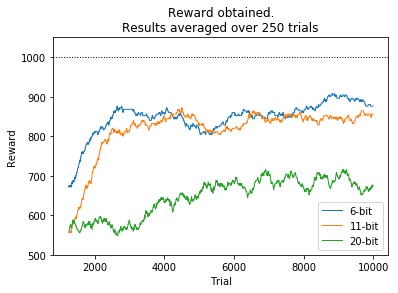

In [15]:
window=250

fig, ax = plt.subplots()

df6bit['reward'].rolling(window=window).mean().plot(label='6-bit', linewidth=1.0, ax=ax)
df11bit['reward'].rolling(window=window).mean().plot(label='11-bit', linewidth=1.0, ax=ax)
df20bit['reward'].rolling(window=window).mean().plot(label='20-bit', linewidth=1.0, ax=ax)
plt.axhline(1000, c='black', linewidth=1.0, linestyle=':')


ax.set_xlabel('Trial')
ax.set_ylabel('Reward')
ax.set_title(f'Reward obtained.\nResults averaged over {window} trials')
ax.set_ylim([500, 1050])

plt.legend()
plt.show()